# Classification des sentiments
### SOYKOK Aylin 28711545 - CELIK Simay 28713301
## Machine Learning 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
import re
import os.path
import string
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
from utils_donnee import *
from evaluation import *
import pandas as pd

# Chargement des données
path = "./datasets/movies/movies1000/"
alltxts,alllabs = load_movies(path)

C:\Users\PC\AppData\Local\Temp\ipykernel_19148\2310396978.py:14: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## C) Modèles de Machine Learning + Métriques d'évaluation

### Durée de classification selon la taille de vocabulaire et le classifieur

In [69]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(alltxts)
vocabulary = vectorizer.vocabulary_
max_features_list = [100,1000,3000,5000,10000,len(vocabulary)]
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor= lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
best_result = [0,0,0,0]
best_max = 0
resultats = []
for max_features in max_features_list:
    vect_params = {'max_features':max_features}
    res = comparaison_evaluation_single(preprocessor,vectorizer,vect_params,model_params_LR,model_params_SVM,eval_func=eval_crossval,result_type='svm',timer=True)
    best_res = list(np.array(res).max(axis=0))
    resultats.append(res)
    if accuracy_difference(best_res,best_result)[1] > 0.5:
        best_result = best_res
        best_max = max_features
print("Meilleur max_features",best_max)

Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Resultats cross validation
Durée d'exécution : 1.0420680046081543
Acc	F1	ROC-AUC	AP:
0.7230 	0.7271 	0.7884 	0.7825
_____________________________________________

SVM 
Résultats
Resultats cross validation
Durée d'exécution : 1.024139642715454
Acc	F1	ROC-AUC	AP:
0.7260 	0.7306 	0.7918 	0.7865
_____________________________________________

 MultinomialNB 
Résultats
Resultats cross validation
Durée d'exécution : 0.931006669998169
Acc	F1	ROC-AUC	AP:
0.6970 	0.7035 	0.7554 	0.7552
______________________________________________________
Taux d'accuracy de LinReg contre LinSVM : 0.0
Taux d'accuracy de LinReg contre Multinom : 1.0
Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Resultats cross validation
Durée d'exécution : 1.428999662399292
Acc	F1	ROC-AUC	AP:
0.8090 	0.8105 	0.8896 	0.8844
_____________________________________________

SVM 
Résultats
Resultats cross validation
Durée d'exécution : 1.1910068988800049
Acc

In [70]:
classifiers = ['Logistic Regression', 'LinearSVC', 'Multinomial NB']
accuracy_tuples = ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']
columns = pd.MultiIndex.from_product([classifiers, accuracy_tuples])
df = pd.DataFrame(columns=columns)
for i, sublist in enumerate(resultats):
    for j, tup in enumerate(sublist):
        for k, acc in enumerate(tup):
            df.loc[max_features_list[i], (classifiers[j], accuracy_tuples[k])] = acc

#df.index = max_features_list
df

Logistic Regression                                   LinearSVC  \
                 Accuracy        F1   ROC AUC Avg Precision  Accuracy   
100                 0.723  0.727094  0.788418      0.782518     0.726   
1000                0.809  0.810516  0.889579      0.884381     0.825   
3000               0.8465   0.84734  0.921678      0.921313     0.858   
5000               0.8625  0.864465  0.930277      0.929092    0.8635   
10000              0.8665  0.868408  0.933597       0.93219     0.866   
39659              0.8595  0.860822  0.932175      0.930734    0.8605   

                                        Multinomial NB                      \
             F1   ROC AUC Avg Precision       Accuracy        F1   ROC AUC   
100     0.73058  0.791789      0.786479          0.697  0.703523  0.755411   
1000   0.827756  0.906926      0.906084         0.7965  0.798215  0.874637   
3000   0.859406  0.927646      0.927778         0.8155   0.81106  0.897088   
5000   0.865583  0.932639      0.932113         0.8185  0.812209  0.899805   
10000   0.86772  0.934225      0.933232          0.821   0.81018  0.901289   
39659  0.861813  0.932235      0.931197          0.819  0.810073  0.900667   

                     
      Avg Precision  
100        0.755197  
1000       0.876179  
3000       0.901223  
5000       0.900659  
10000      0.900713  
39659      0.900872

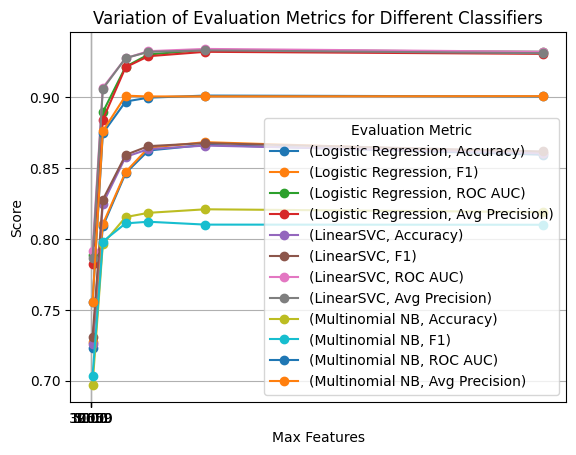

In [71]:
# Plot the DataFrame
df.plot(marker='o')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Variation of Evaluation Metrics for Different Classifiers')
plt.xticks(range(len(df.index)), df.index)
plt.legend(title='Evaluation Metric')
plt.grid(True)
plt.show()

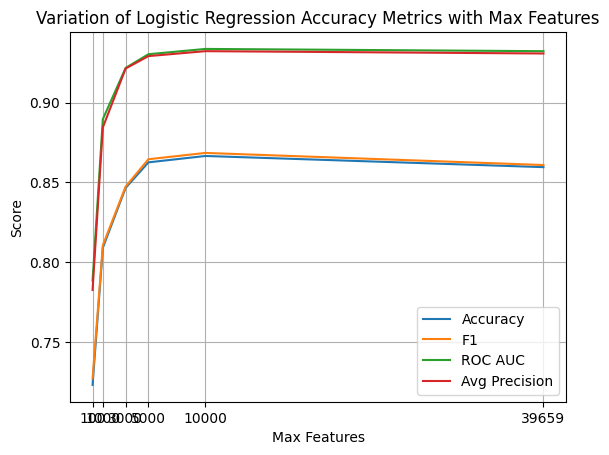

In [72]:
logistic_regression_data = df['Logistic Regression']
for metric in ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']:
    plt.plot(logistic_regression_data.index, logistic_regression_data[metric], label=metric)
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Variation of Logistic Regression Accuracy Metrics with Max Features')
plt.xticks(logistic_regression_data.index)
plt.legend()
plt.grid(True)
plt.show()


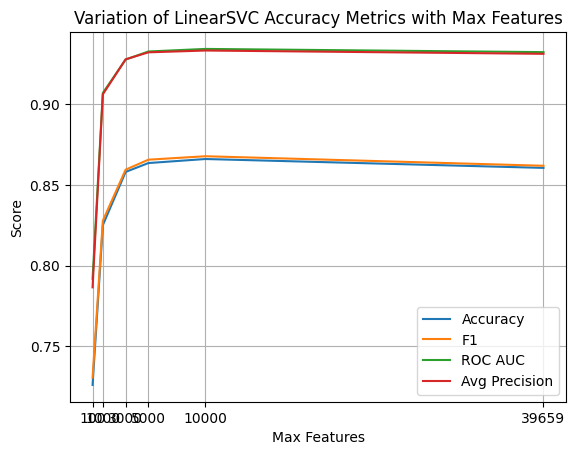

In [73]:
svc_data = df['LinearSVC']
for metric in ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']:
    plt.plot(svc_data.index, svc_data[metric], label=metric)
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Variation of LinearSVC Accuracy Metrics with Max Features')
plt.xticks(svc_data.index)
plt.legend()
plt.grid(True)
plt.show()

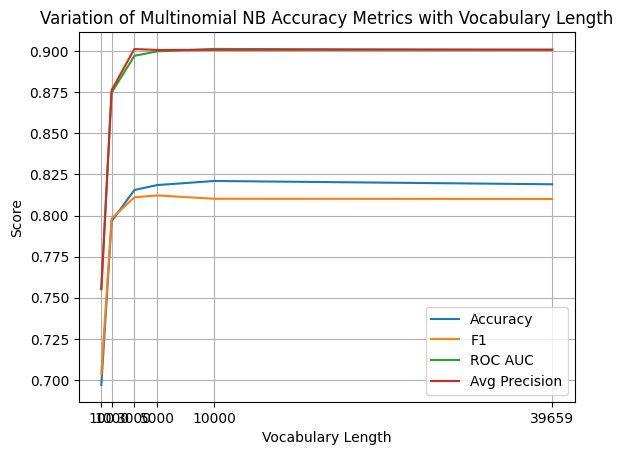

In [17]:
multinomial_data = df['Multinomial NB']
for metric in ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']:
    plt.plot(multinomial_data.index, multinomial_data[metric], label=metric)
plt.xlabel('Vocabulary Length')
plt.ylabel('Score')
plt.title('Variation of Multinomial NB Accuracy Metrics with Vocabulary Length')
plt.xticks(multinomial_data.index)
plt.legend()
plt.grid(True)
plt.show()

**comparaison des durées**

In [78]:
#il faut changer toutes les fonction afin d'envoyer la durée donc voici les durées extraites
durations = [
    [0.9715800285339355, 0.9895877838134766, 0.8769996166229248],
    [1.4561583995819092, 1.1812958717346191, 0.9959983825683594],
    [2.2609152793884277, 1.2938144207000732, 1.1350064277648926],
    [1.5994572639465332, 1.2529544830322266, 0.9749917984008789],
    [1.758985996246338, 1.5459613800048828, 1.0319857597351074],
    [1.9739978313446045, 1.8548102378845215, 0.9769985675811768]
]

columns = ['Logistic Regression', 'SVM', 'MultinomialNB'] 

df_time = pd.DataFrame(durations,columns=columns)
df_time

,Logistic Regression,SVM,MultinomialNB
0,0.971580,0.989588,0.877000
1,1.456158,1.181296,0.995998
2,2.260915,1.293814,1.135006
3,1.599457,1.252954,0.974992
4,1.758986,1.545961,1.031986
5,1.973998,1.854810,0.976999


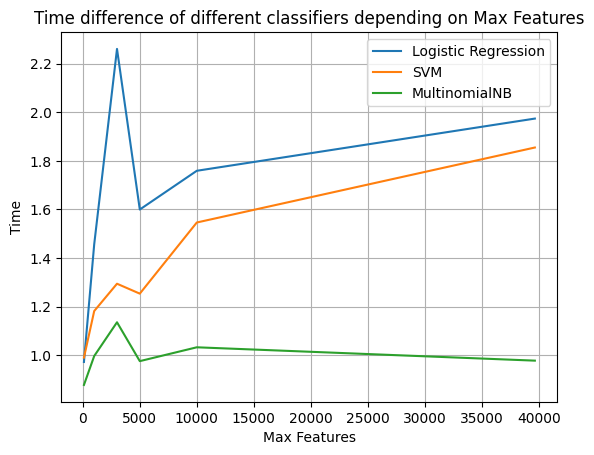

In [79]:
for i,metric in enumerate(df_time.columns):
        x_values = max_features_list
        y_values = df_time[metric]
        plt.plot(x_values, y_values, label=f'{metric}')

plt.xlabel('Max Features')
plt.ylabel('Time')
plt.title('Time difference of different classifiers depending on Max Features')
plt.legend()
plt.grid(True)
plt.show()

### Mise en place de la validation croisée au lieu de train-test-split

In [6]:
vect_params_tf, vect_params_svm = {},{}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
res_tous = comparaison_evaluation_single(preprocessor,TfidfVectorizer,vect_params_tf,model_params_LR,model_params_SVM,eval_func=eval_crossval)
print("______________________")


Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8600 	0.8612 	0.9321 	0.9308
_____________________________________________

SVM 
Résultats
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8600 	0.8611 	0.9321 	0.9311
_____________________________________________

 MultinomialNB 
Résultats
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8200 	0.8115 	0.9008 	0.9010
______________________________________________________
Taux d'accuracy de LinReg contre LinSVM : 0.5
Taux d'accuracy de LinReg contre Multinom : 1.0
______________________


In [7]:
res_tous

[(0.86, 0.8612487611496531, 0.93211, 0.9308077597545967),
 (0.86, 0.8611111111111112, 0.932135, 0.931117042809138),
 (0.82, 0.8115183246073299, 0.900795, 0.901006973837914)]

In [8]:
classifiers = ['Logistic Regression', 'LinearSVC', 'Multinomial NB']
accuracy_tuples = ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']
columns = pd.MultiIndex.from_product([classifiers, accuracy_tuples])
df_cv = pd.DataFrame(res_tous)
df_cv.index = classifiers
df_cv.columns = accuracy_tuples
df_cv

,Accuracy,F1,ROC AUC,Avg Precision
Logistic Regression,0.86,0.861249,0.932110,0.930808
LinearSVC,0.86,0.861111,0.932135,0.931117
Multinomial NB,0.82,0.811518,0.900795,0.901007


Resultats cross validation
Best k =  9
Acc	F1	ROC-AUC	AP:
0.8670 	0.8678 	0.9356 	0.9348


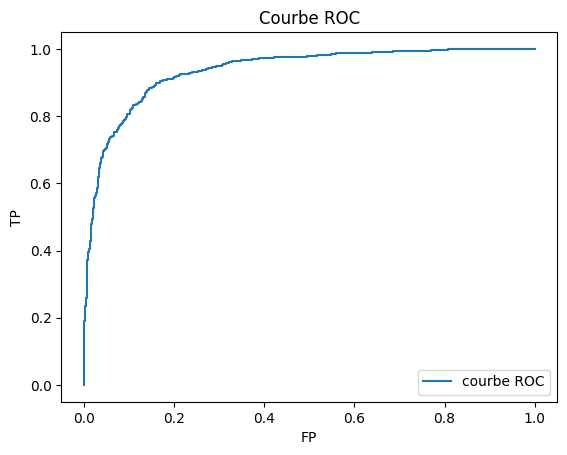

______________________


In [10]:
vect_params = {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
liste_k = [i for i in range(2,21)]

best_k,res,tous =comparaison_crossval(preprocessor,TfidfVectorizer,vect_params,LogisticRegression,model_params_LR,graphe=True,cvs=liste_k)
print("______________________")


In [29]:
k_res = pd.DataFrame(tous,columns=['Acc', 'F1', 'ROC-AUC', 'AP'])
k_res.index = liste_k
k_res

,Acc,F1,ROC-AUC,AP
2,0.8360,0.837624,0.912136,0.909796
3,0.8490,0.850495,0.923317,0.922840
4,0.8580,0.858987,0.928189,0.927202
5,0.8600,0.861249,0.932110,0.930808
6,0.8580,0.859127,0.934070,0.933575
7,0.8615,0.862667,0.933285,0.932806
8,0.8650,0.865672,0.935425,0.934156
9,0.8670,0.867793,0.935645,0.934803
10,0.8625,0.862980,0.935138,0.934952
11,0.8615,0.861983,0.936598,0.936461


In [34]:
def plot_evaluation_metrics(results_data, k_list):
    colors = ['b', 'g', 'r', 'c']
    for i,metric in enumerate(results_data.columns):
        x_values = k_list
        y_values = results_data[metric]
        plt.plot(x_values, y_values, label=f'{metric}', color=colors[i])

    plt.xlabel('Value of k in Cross-Validation')
    plt.ylabel('k')
    plt.title('Evaluation Metrics for Different Values of k in Cross-Validation')
    plt.legend()
    plt.grid(True)
    plt.show()

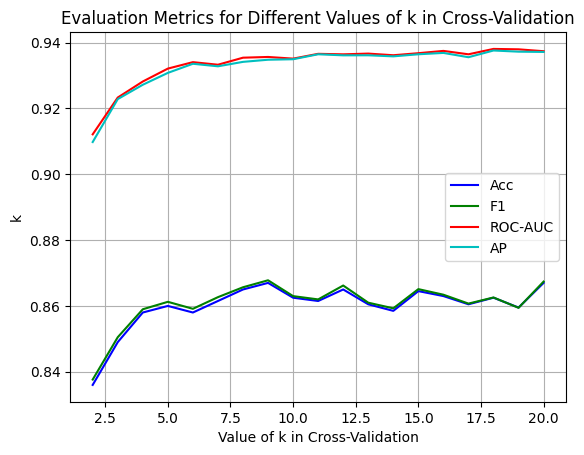

In [35]:
plot_evaluation_metrics(k_res,liste_k)

Resultats cross validation
Best k =  18
Acc	F1	ROC-AUC	AP:
0.8670 	0.8671 	0.9380 	0.9376


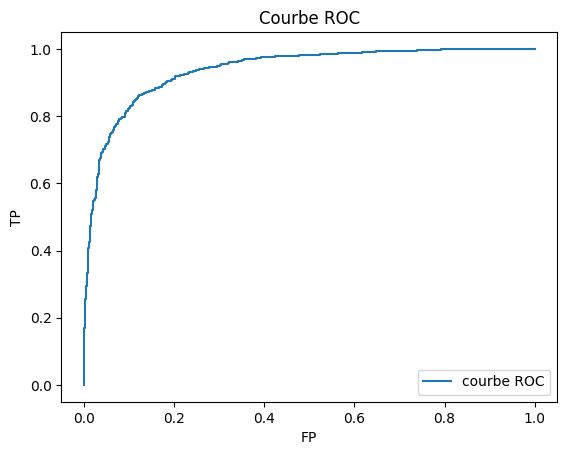

______________________


,Acc,F1,ROC-AUC,AP
2,0.8335,0.835067,0.910969,0.909077
3,0.8510,0.851889,0.922539,0.922497
4,0.8585,0.859274,0.927803,0.926867
5,0.8600,0.861111,0.932135,0.931117
6,0.8605,0.861950,0.933468,0.932968
7,0.8630,0.864491,0.932900,0.932709
8,0.8655,0.866103,0.935022,0.933984
9,0.8640,0.864542,0.935313,0.934662
10,0.8640,0.864811,0.934973,0.934889
11,0.8630,0.863410,0.936374,0.936314


In [36]:
best_k2,res2,tous2 =comparaison_crossval(preprocessor,TfidfVectorizer,vect_params,LinearSVC,model_params_SVM,graphe=True,cvs=liste_k)
print("______________________")
k_res2 = pd.DataFrame(tous2,columns=['Acc', 'F1', 'ROC-AUC', 'AP'])
k_res2.index = liste_k
k_res2

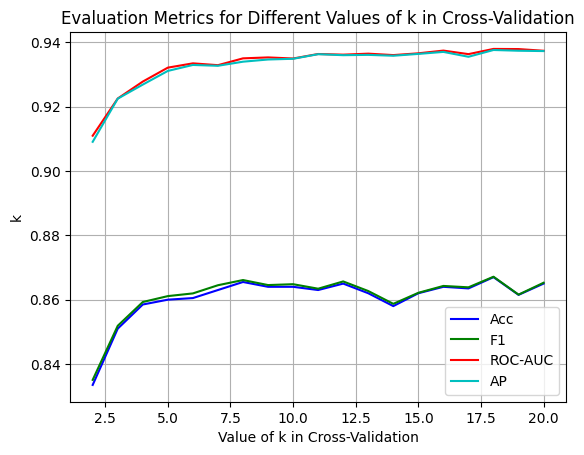

In [37]:
plot_evaluation_metrics(k_res2,liste_k)


### quelques essaies pour trouver les paramètres de vectorizer utiles

In [38]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(alltxts)
vocabulary = vectorizer.vocabulary_
max_features_list = [100,500,1000,1500,3000,3500,4000,4500,5000,6000,10000,20000,len(vocabulary)]
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor= lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
best_result = [0,0,0,0]
best_max = 0
for max_features in max_features_list:
    vect_params = {'max_features':max_features}
    res = eval_crossval(preprocessor,vectorizer,vect_params,model=LogisticRegression, model_params=model_params_LR,graphe=False)
    if accuracy_difference(res,best_result)[1] > 0.5:
        best_result = res
        best_max = max_features
print("Meilleur max_features",best_max)

Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.7230 	0.7271 	0.7884 	0.7825
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.7920 	0.7914 	0.8602 	0.8448
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8090 	0.8105 	0.8896 	0.8844
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8280 	0.8290 	0.9084 	0.9047
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8465 	0.8473 	0.9217 	0.9213
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8530 	0.8546 	0.9246 	0.9235
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8595 	0.8608 	0.9285 	0.9268
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8615 	0.8628 	0.9299 	0.9284
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8625 	0.8645 	0.9303 	0.9291
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8665 	0.8685 	0.9326 	0.9313
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8665 	0.8684 	0.9336 	0.9322
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8605 	0.8621 	0.9325 	0.9313
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8595 	0.8608 	0.9322 	0.9307

Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8665 	0.8684 	0.9336 	0.9322


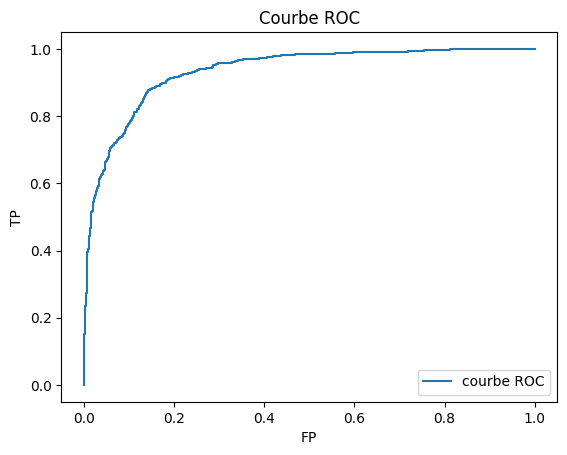

______________________


In [39]:
vect_params = {'max_features':best_max}
cv=8
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
res = eval_crossval(preprocessor=preprocessor, vectorizer=TfidfVectorizer, vect_params=vect_params,
    model=LogisticRegression, model_params=model_params_LR,graphe=True)
print("______________________")


In [40]:
vect_params = {'max_features':best_max}
cv=best_k2
model_params_SVM = {'random_state': 0,'dual': False}
res = eval_crossval(preprocessor=preprocessor, vectorizer=TfidfVectorizer, vect_params=vect_params,
    model=LinearSVC, model_params=model_params_SVM,graphe=False)
print("______________________")


Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8660 	0.8677 	0.9342 	0.9332
______________________


In [41]:
eng_stop_words = stopwords.words('english')
#preprocessed_eng_stop_words = [stem(word) for word in eng_stop_words]
vect_params = {'stop_words':eng_stop_words}
cv=18
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}

res = eval_crossval(preprocessor=preprocessor, vectorizer=TfidfVectorizer, vect_params=vect_params,
    model=LogisticRegression, model_params=model_params_LR,graphe=False)
print("______________________")


c:\Users\PC\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(


Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8545 	0.8562 	0.9320 	0.9284
______________________


In [43]:
vect_params = {'max_features':best_max}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: stem(remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text)))))
liste_k = [i for i in range(2,21)]

best_k,res,tous =comparaison_crossval(preprocessor,TfidfVectorizer,vect_params,LogisticRegression,model_params_LR,graphe=False,cvs=liste_k)
print("______________________")


Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8595 	0.8611 	0.9300 	0.9288
______________________


<b> Les résultats qu'on obtient avec la validation croisée est plus effectives.

### stabilité de la validation croisée

In [51]:
vect_params = {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
liste_k = [8]
liste_res = []
for random_state in [3,10,42,120,300] :
    print(random_state)
    liste_res.append(comparaison_crossval_grain(preprocessor,TfidfVectorizer,vect_params,LinearSVC,model_params_SVM,graphe=True,cvs=liste_k,random_state=random_state))
print("______________________")
print(liste_res)


3
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8674 	0.8682 	0.9312 	0.9281
10
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8640 	0.8646 	0.9300 	0.9303
42
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8657 	0.8667 	0.9299 	0.9256
120
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8611 	0.8609 	0.9315 	0.9307
300
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8634 	0.8638 	0.9342 	0.9340
______________________
[(8, [0.8674285714285714, 0.8681818181818182, 0.931203918367347, 0.9281146685920616]), (8, [0.864, 0.8646188850967008, 0.9300271020408164, 0.9302916623323632]), (8, [0.8657142857142858, 0.8667044809982983, 0.9299330612244896, 0.9255715908246077]), (8, [0.8611428571428571, 0.86090440755581, 0.931514775510204, 0.9307051703397353]), (8, [0.8634285714285714, 0.8638176638176638, 0.9341857959183674, 0.9340211109367135])]


In [53]:
liste_res = [lst for k,lst in liste_res]
df_stabilite = pd.DataFrame(liste_res,columns=['Acc', 'F1', 'ROC-AUC', 'AP'])
df_stabilite.index = [3,10,42,120,300]
df_stabilite

,Acc,F1,ROC-AUC,AP
3,0.867429,0.868182,0.931204,0.928115
10,0.864000,0.864619,0.930027,0.930292
42,0.865714,0.866704,0.929933,0.925572
120,0.861143,0.860904,0.931515,0.930705
300,0.863429,0.863818,0.934186,0.934021


In [55]:
df_stabilite.describe()

,Acc,F1,ROC-AUC,AP
count,5.000000,5.000000,5.000000,5.000000
mean,0.864343,0.864845,0.931373,0.929741
std,0.002377,0.002794,0.001721,0.003146
min,0.861143,0.860904,0.929933,0.925572
25%,0.863429,0.863818,0.930027,0.928115
50%,0.864000,0.864619,0.931204,0.930292
75%,0.865714,0.866704,0.931515,0.930705
max,0.867429,0.868182,0.934186,0.934021


Les moyennes sont proches, les ecart-types sont petits donc elle est assez stable.